In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

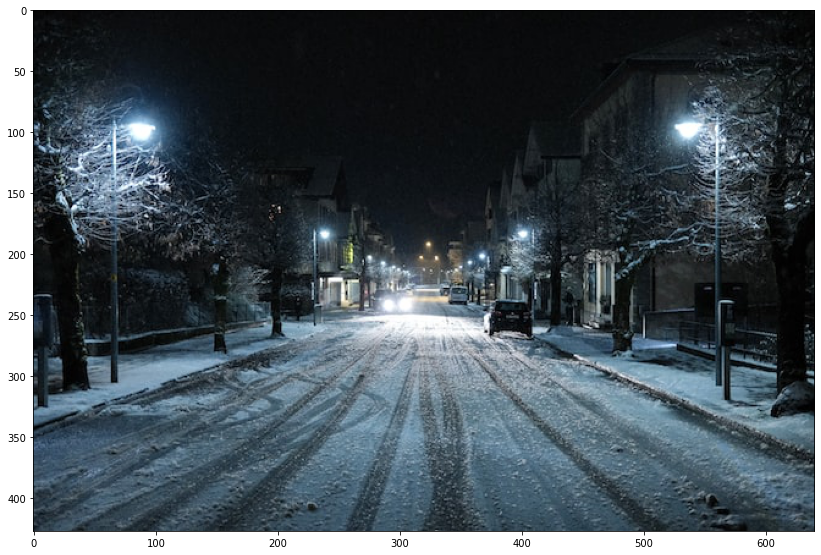

In [27]:
img1 = imread('img1.jpg')
plt.figure(figsize=(14, 18))
plt.imshow(img1)

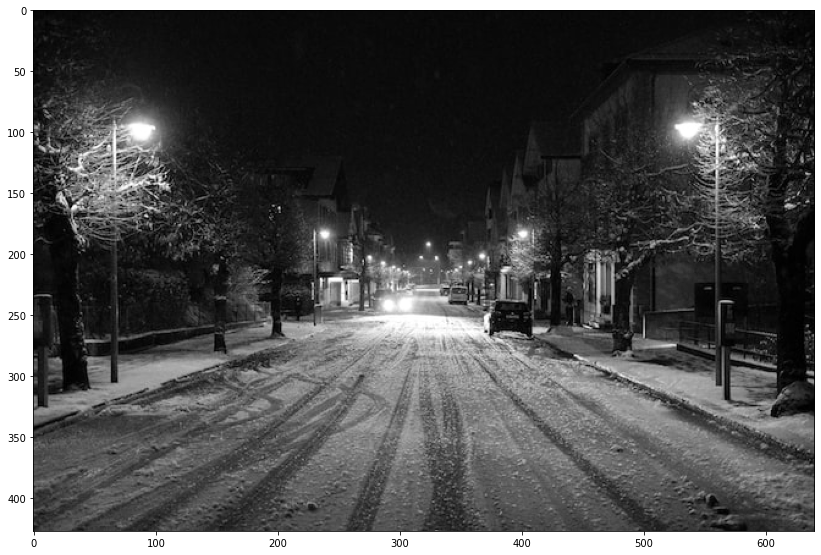

In [28]:
img1_gray = rgb2gray(img1)
plt.figure(figsize=(14, 18))
plt.imshow(img1_gray , cmap="gray")

In [29]:
img1_fft = np.fft.fftshift(np.fft.fft2(img1_gray))
img1_amplitude = np.sqrt(np.real(img1_fft) ** 2 + np.imag(img1_fft) ** 2)
img1_phase = np.arctan2(np.imag(img1_fft), np.real(img1_fft))

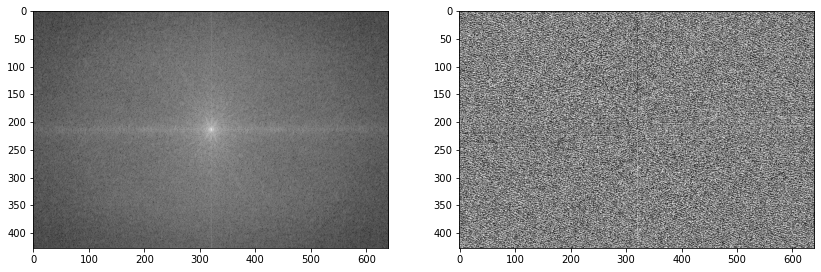

In [30]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img1_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img1_phase, cmap='gray')

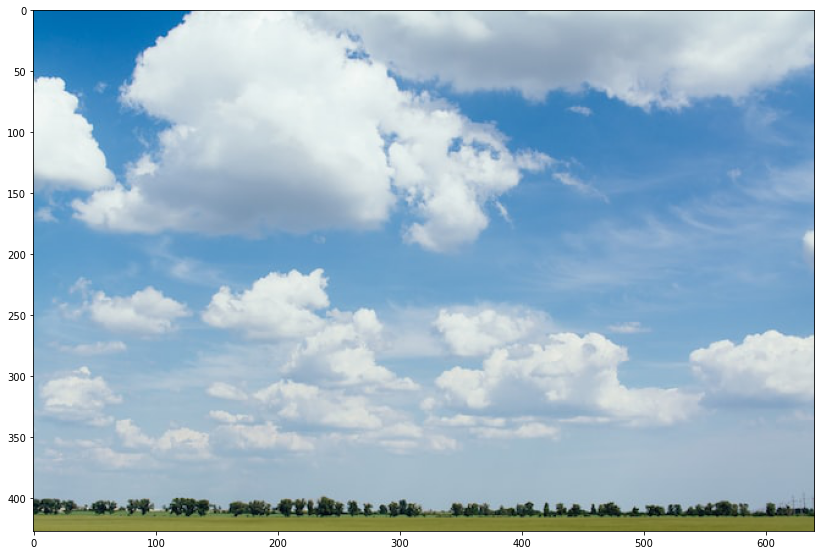

In [31]:
img2 = imread('img2.jpg')
plt.figure(figsize=(14, 18))
plt.imshow(img2)

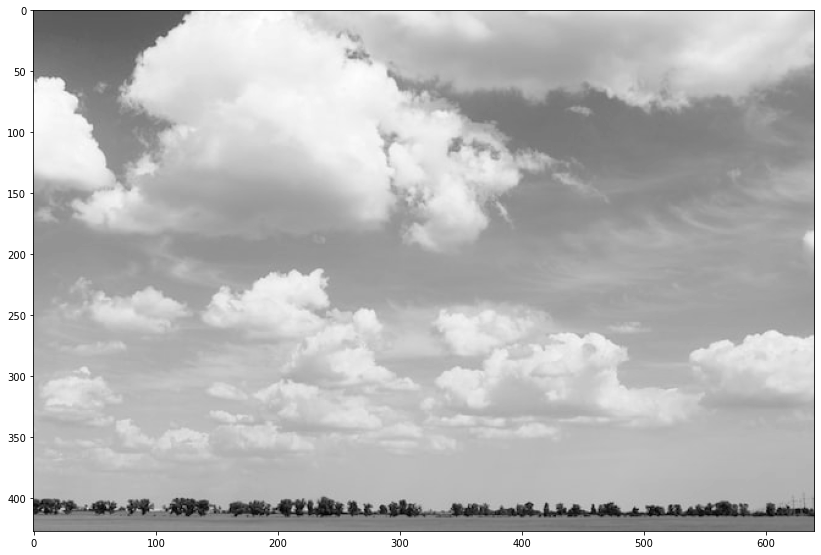

In [32]:
img2_gray = rgb2gray(img2)
plt.figure(figsize=(14, 18))
plt.imshow(img2_gray , cmap="gray")

In [33]:
img2_fft = np.fft.fftshift(np.fft.fft2(img2_gray))
img2_amplitude = np.sqrt(np.real(img2_fft) ** 2 + np.imag(img2_fft) ** 2)
img2_phase = np.arctan2(np.imag(img2_fft), np.real(img2_fft))

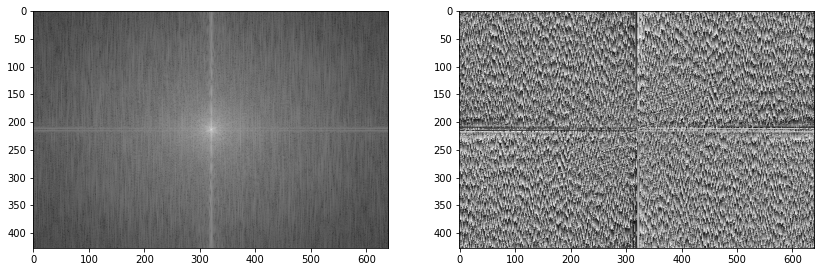

In [34]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(img2_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(img2_phase, cmap='gray')

In [35]:
comb = np.multiply(img1_amplitude, np.exp(1j * img2_phase))
desert_coffee = np.real(np.fft.ifft2(comb)) 

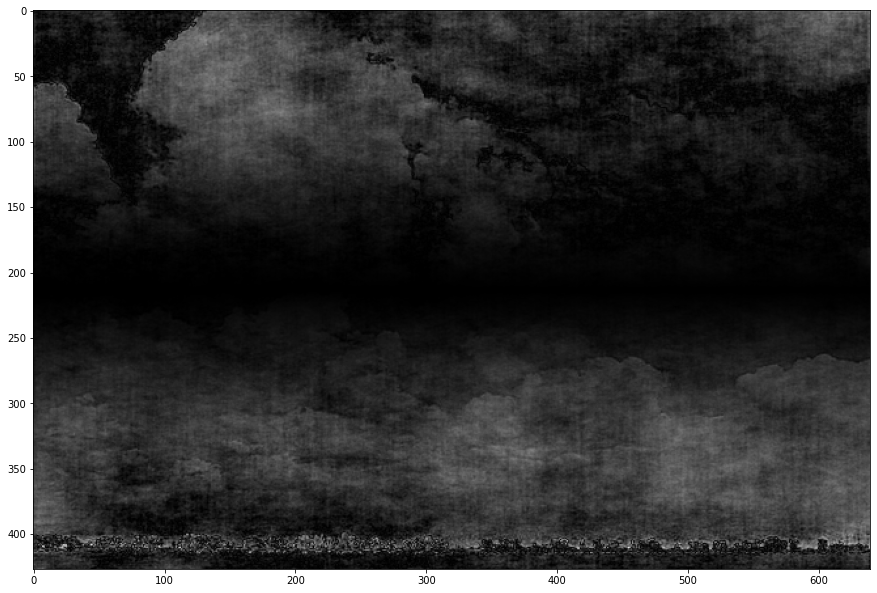

In [36]:
plt.figure(figsize=(15, 20))
plt.imshow(np.abs(desert_coffee), cmap='gray')

In [37]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    return final_image

In [38]:
trans = fourier_transform_rgb(img1)